In [1]:
import pandas as pd

In [2]:
uber_demand_gap = pd.read_csv('C:/Users/Rajendra/Desktop/Data Analysis/Labmentix Internship/Project 2/Uber_Request_Data.csv', delimiter=';')

In [3]:
print("uber demand shape:", uber_demand_gap.shape)

uber demand shape: (6745, 8)


In [4]:
print(uber_demand_gap.info()) # to check the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   request_id       6745 non-null   int64 
 1   pickup_point     6745 non-null   object
 2   driver_id        6745 non-null   int64 
 3   status           6745 non-null   object
 4   time_of_request  6745 non-null   object
 5   date_of_request  6745 non-null   object
 6   drop_time        2831 non-null   object
 7   drop_date        2831 non-null   object
dtypes: int64(2), object(6)
memory usage: 421.7+ KB
None


In [5]:
print(uber_demand_gap.head()) # to check the missing values

   request_id pickup_point  driver_id             status time_of_request  \
0           1      Airport        285     Trip Completed        00:20:00   
1           2      Airport          0  No Cars Available        00:23:00   
2           3      Airport         80     Trip Completed        00:24:00   
3           4         City          0  No Cars Available        00:37:00   
4           5      Airport        264     Trip Completed        00:36:00   

  date_of_request drop_time   drop_date  
0      2016-07-11  00:51:00  2016-07-11  
1      2016-07-11       NaN         NaN  
2      2016-07-11  01:31:00  2016-07-11  
3      2016-07-11       NaN         NaN  
4      2016-07-11  01:35:00  2016-07-11  


In [6]:
uber_demand_gap['hour_of_request'] = pd.to_datetime(
    uber_demand_gap['time_of_request'], 
    format='%H:%M:%S', 
    errors='coerce'
).dt.hour

In [7]:
 #time_slot grouped the rides by Time Slot

def get_time_slot(hour):
    if pd.isna(hour): return 'Unknown'
    if 0 <= hour <= 4:
        return 'Late Night'
    elif 5 <= hour <= 8:
        return 'Early Morning'
    elif 9 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

uber_demand_gap['time_slot'] = uber_demand_gap['hour_of_request'].apply(get_time_slot)

In [8]:
uber_demand_gap['time_slot'].value_counts()

time_slot
Evening          1893
Early Morning    1672
Morning          1029
Night             947
Afternoon         626
Late Night        578
Name: count, dtype: int64

In [9]:
#gap_flag 

uber_demand_gap['gap_flag'] = uber_demand_gap['status'].apply
(lambda x:'Gap' if x in ['Cancelled', 'No Cars Avalailable'] else 'Completed')

<function __main__.<lambda>(x)>

In [10]:
uber_demand_gap['status'].value_counts()

status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [11]:
# Time-slot based gap rate -  grouped the rides by Time Slot

gap_data = uber_demand_gap.copy()
gap_data['is_gap'] = gap_data['status'].isin(['Cancelled', 'No Cars Available'])

gap_pct = (
    gap_data.groupby('time_slot')['is_gap']
    .mean() * 100
).sort_values(ascending=False)
print(gap_pct)

time_slot
Evening          66.085578
Late Night       62.975779
Early Morning    59.270335
Night            57.866948
Morning          48.979592
Afternoon        40.894569
Name: is_gap, dtype: float64


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Create 'gap_flag' column

uber_demand_gap['gap_flag'] = uber_demand_gap['status'].apply(
lambda x: 'Gap' if x in ['Cancelled', 'No Cars Available'] else 'Completed')

In [14]:
# Group and calculate percentages

gap_summary = (
    uber_demand_gap.groupby(['time_slot', 'gap_flag'])
    .size()
    .reset_index(name='count')
)


In [15]:
#Convert to percentage row-wise

gap_pivot = gap_summary.pivot(index='time_slot', columns='gap_flag', values='count').fillna(0)

In [16]:
# Convert raw counts to percentages (row-wise)

gap_pct = gap_pivot.div(gap_pivot.sum(axis=1), axis=0) * 100

In [17]:
# to Add missing columns with 0%

for col in ['Completed', 'Gap']:
    if col not in gap_pct.columns:
        gap_pct[col] = 0

In [18]:
# Reorder to match desired stacking
gap_pct = gap_pct[['Completed', 'Gap']]

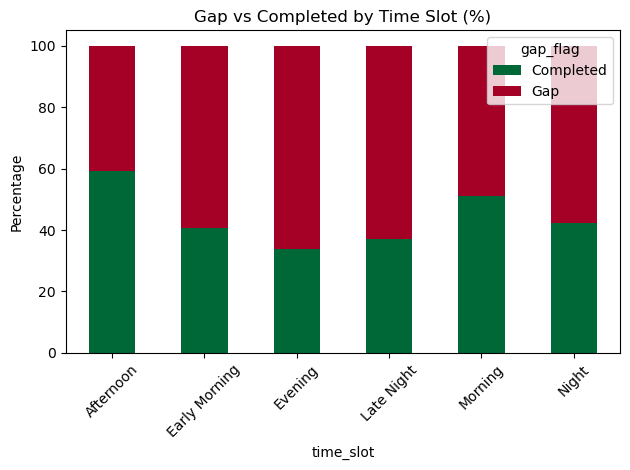

In [19]:
#Plot
gap_pct.plot(kind='bar', stacked=True, colormap='RdYlGn_r')
plt.title('Gap vs Completed by Time Slot (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print(gap_pct)

gap_flag       Completed        Gap
time_slot                          
Afternoon      59.105431  40.894569
Early Morning  40.729665  59.270335
Evening        33.914422  66.085578
Late Night     37.024221  62.975779
Morning        51.020408  48.979592
Night          42.133052  57.866948


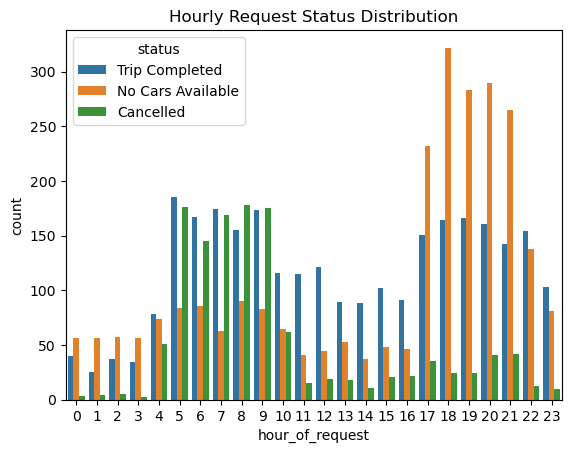

In [21]:
# Requests by Hour of Day
sns.countplot(data=uber_demand_gap, x='hour_of_request', hue='status')
plt.title('Hourly Request Status Distribution')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Count of rides failed per hour of day
# Create a 'gap_flag' again

uber_demand_gap['Gap_flag'] = uber_demand_gap['status'].apply
(lambda x: 'gap' if x in ['Cancelled', 'No Cars Available'] else 'Completed')


<function __main__.<lambda>(x)>

In [23]:
#Count Gap vs Completed per hour

hourly_gap = uber_demand_gap.groupby(['hour_of_request' , 'gap_flag'])['request_id'].count().unstack().fillna(0)

In [24]:
# Convert to %

hourly_gap_pct = hourly_gap.div(hourly_gap.sum(axis=1), axis=0) * 100

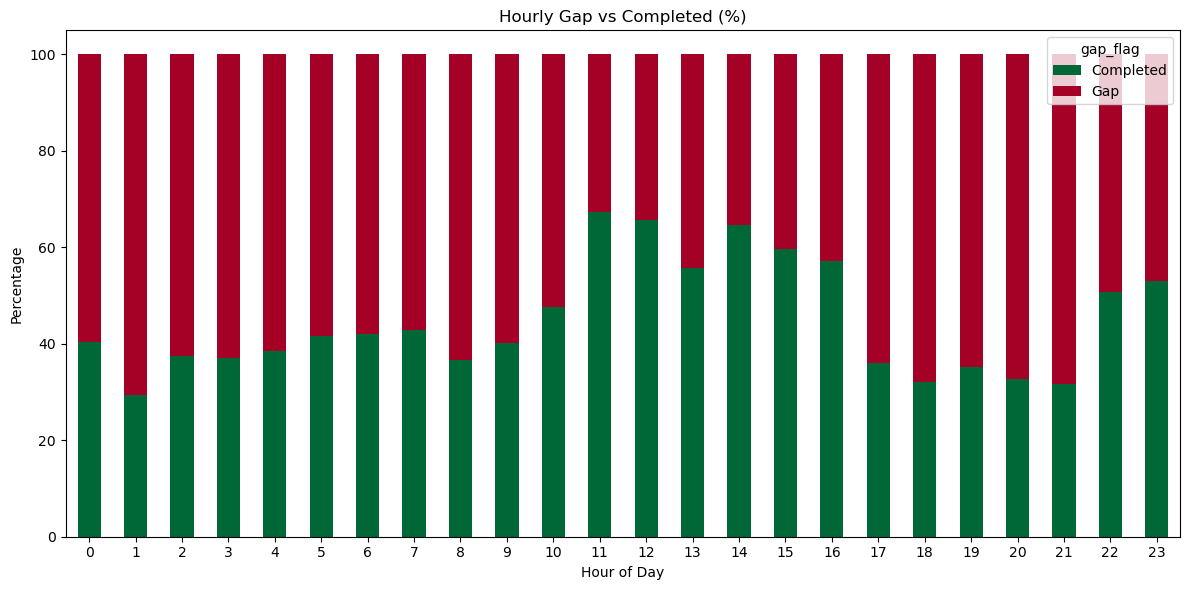

In [25]:
# Plot

hourly_gap_pct[['Completed', 'Gap']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlGn_r')
plt.title('Hourly Gap vs Completed (%)')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
import seaborn as sns

In [27]:
# Create matrix: pickup_point × status

pickup_status = pd.crosstab(uber_demand_gap['pickup_point'], uber_demand_gap['status'])

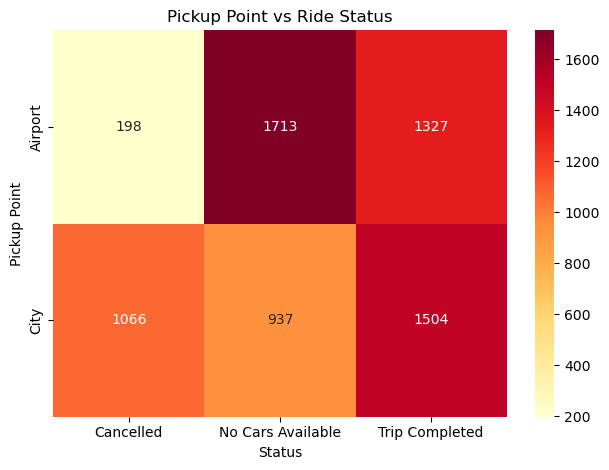

In [28]:
# heatmap

sns.heatmap(pickup_status, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Pickup Point vs Ride Status')
plt.xlabel('Status')
plt.ylabel('Pickup Point')
plt.tight_layout()
plt.show()

In [29]:
# If failed rides are missing drivers
# Add a new column: driver assigned or not

uber_demand_gap['driver_assigned'] = uber_demand_gap['driver_id'].notnull()

In [30]:
# Count driver availability by status
driver_status = pd.crosstab(
    uber_demand_gap['status'], 
    uber_demand_gap['driver_assigned']
)

In [31]:
# Rename columns for clarity
driver_status.columns = [
    'No Driver Assigned' if col == False else 'Driver Assigned'
    for col in driver_status.columns]

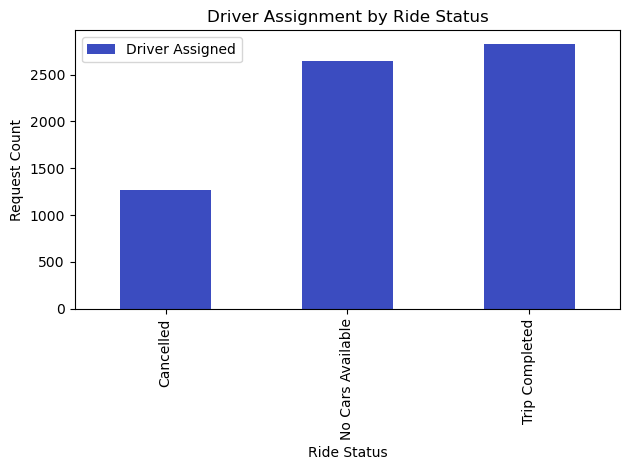

In [32]:
#
driver_status.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Driver Assignment by Ride Status')
plt.xlabel('Ride Status')
plt.ylabel('Request Count')
plt.tight_layout()
plt.show()